In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [15]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('main dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('main dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5984 images belonging to 2 classes.
Found 1496 images belonging to 2 classes.


In [16]:
training_set.class_indices

{'covid': 0, 'normal': 1}

In [17]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [18]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [19]:
from timeit import default_timer as timer
start = timer()


 

history =classifier.fit_generator(training_set,                         
                         epochs = 35,
                         validation_data = test_set
                         )

end = timer() 
print('Training Completed!')
print("Time Elapsed in seconds",  (end - start))

Epoch 1/35
187/187 [==============================] - 20s 105ms/step - loss: 0.5589 - accuracy: 0.7174 - val_loss: 0.6597 - val_accuracy: 0.6183
Epoch 2/35
187/187 [==============================] - 17s 92ms/step - loss: 0.4418 - accuracy: 0.7913 - val_loss: 0.7914 - val_accuracy: 0.6290
Epoch 3/35
187/187 [==============================] - 17s 92ms/step - loss: 0.3855 - accuracy: 0.8215 - val_loss: 0.6474 - val_accuracy: 0.6698
Epoch 4/35
187/187 [==============================] - 17s 93ms/step - loss: 0.3589 - accuracy: 0.8386 - val_loss: 0.6511 - val_accuracy: 0.6985
Epoch 5/35
187/187 [==============================] - 17s 92ms/step - loss: 0.3418 - accuracy: 0.8456 - val_loss: 0.5030 - val_accuracy: 0.7473
Epoch 6/35
187/187 [==============================] - 17s 92ms/step - loss: 0.3222 - accuracy: 0.8571 - val_loss: 0.5543 - val_accuracy: 0.7213
Epoch 7/35
187/187 [==============================] - 17s 92ms/step - loss: 0.3121 - accuracy: 0.8606 - val_loss: 0.4512 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


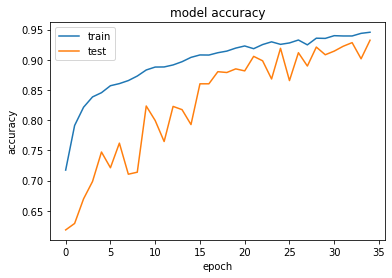

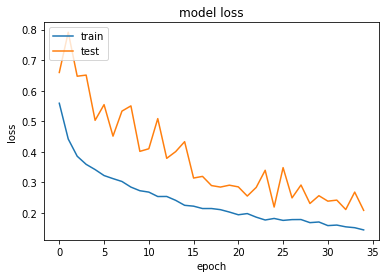

In [20]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:
# save model and architecture to single file
classifier.save('CNN Binary Classifier With RMSprop.h5')
classifier.summary()

print("Saved model to disk")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                